<a href="https://colab.research.google.com/github/ezahner/IDS/blob/main/HW6/Project6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Erin Zahner <br> Project 6 - Python</h2>

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

data.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


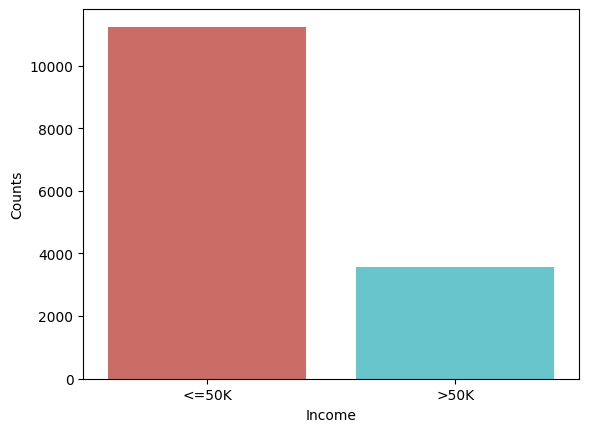

In [ ]:
# Examine target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=data, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()



In [ ]:
#this portion of code is largely taken from your example in GitHub


# We now need to encode the categoric columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_data = pd.DataFrame()

# Encode only the categoric or boolean attributes (if any)
for i in range(0, data.shape[1]):
    if data.dtypes[i]=='object' or data.dtypes[i]=='bool':
        encoded_data[data.columns[i]] = le.fit_transform(data[data.columns[i]])
    else:
        encoded_data[data.columns[i]] = data[data.columns[i]]

encoded_data.head(10)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,6,13,2,4,1,0,0,0
1,38,4,9,0,6,1,0,0,0
2,49,4,5,3,8,0,0,0,0
3,52,6,9,2,4,1,0,0,1
4,31,4,14,4,10,0,14084,0,1
5,40,4,11,2,3,1,0,0,1
6,38,4,7,2,12,1,0,0,0
7,43,4,7,2,14,1,0,2042,0
8,54,0,10,2,0,1,0,0,1
9,39,4,9,0,4,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_data.filter(['age','workclass','education','marital-status','occupation','sex','capital-gain','capital-loss'], axis=1)
y = encoded_data['income']


# 75-25 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.75, stratify=y)

In [ ]:
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (11097, 8)
Test size: (3700, 8)




---


<h2>Create Functions</h2>




---





In [ ]:
#all necessary imports needed for the functions
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#function to create a Decision Tree model
def makeDTModel(criterion, X_train, y_train, max_depth=None, max_leaf_nodes=None):
    dt_classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
    dt_classifier.fit(X_train, y_train)
    return dt_classifier

In [ ]:
#function to display text and graphic representation of a tree classifier
def displayTree(tree_classifier, X):
    plt.figure(figsize=(10, 8))
    plot_tree(tree_classifier, feature_names=X.columns, filled=True)
    plt.show()

In [ ]:
#function to display the Confusion Matrix
def displayCM(classifier, X_train, y_train, X_test, y_test):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))

    #use different colors for the classifers to distinguish them
    if classifier == cart_classifier:
        cmap = 'Blues'
    elif classifier == c5_classifier:
        cmap = 'Purples'
    else:
        cmap = 'pink'  # incase it is given something else for some reason

    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
#function to compare the two models
def compareModels(model1, model2, model1_name='CART', model2_name='C5'):
    accuracies = []

    for model, name in zip([model1, model2], [model1_name, model2_name]):
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"{name} Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(8, 6))
    plt.bar([model1_name, model2_name], accuracies, color=['powderblue', 'thistle'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison')
    plt.ylim(0, 1)  # Set y-axis limit to range of accuracy (0-1)
    plt.show()



---


<h3>Test Functions</h3>

<h4>Max Depth = 2, Max Leaf Nodes = 3</h4>



---



In [ ]:
cart_classifier = makeDTModel("gini", X_train, y_train, max_depth=2, max_leaf_nodes=3)
c5_classifier = makeDTModel("entropy", X_train, y_train, max_depth=2, max_leaf_nodes=3)

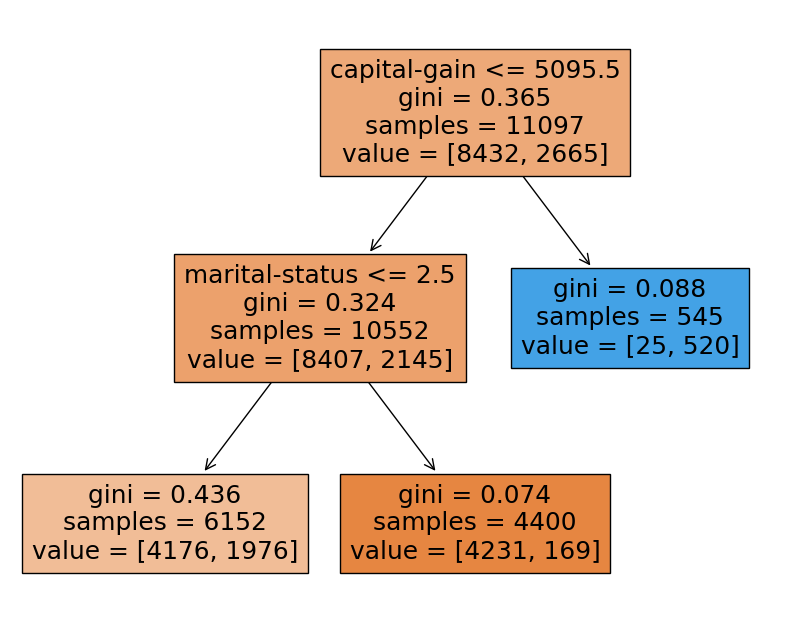

In [ ]:
displayTree(cart_classifier, X)

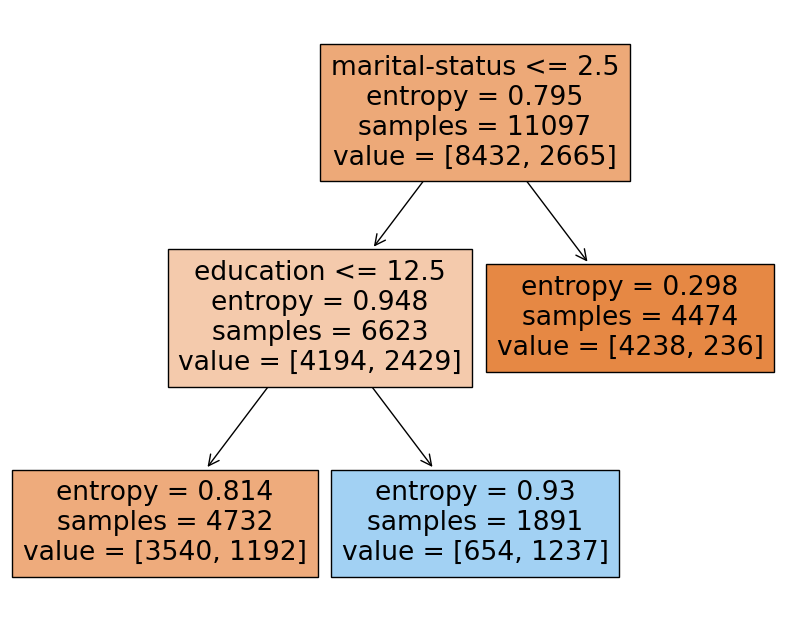

In [ ]:
displayTree(c5_classifier, X)

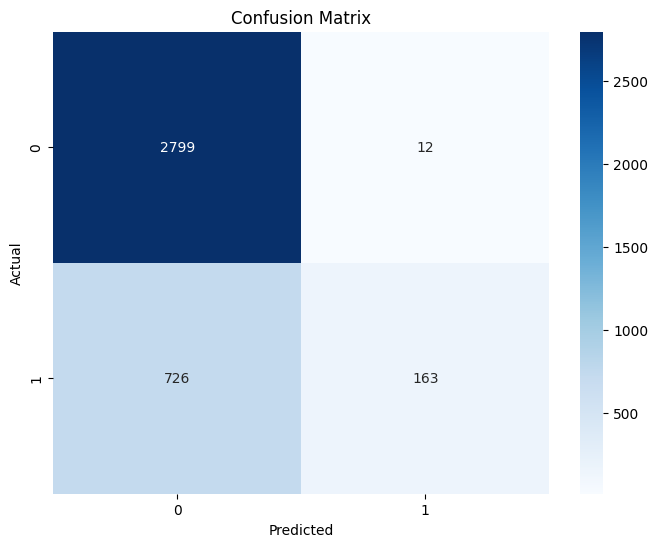

In [ ]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)

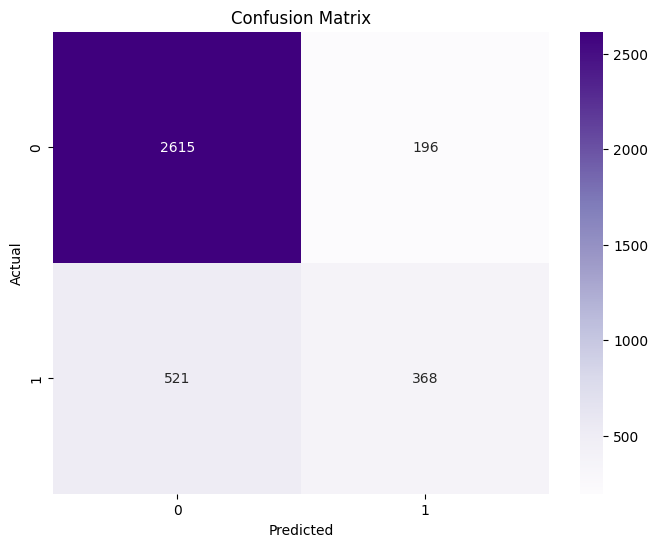

In [ ]:
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

CART Accuracy: 0.8005
C5 Accuracy: 0.8062


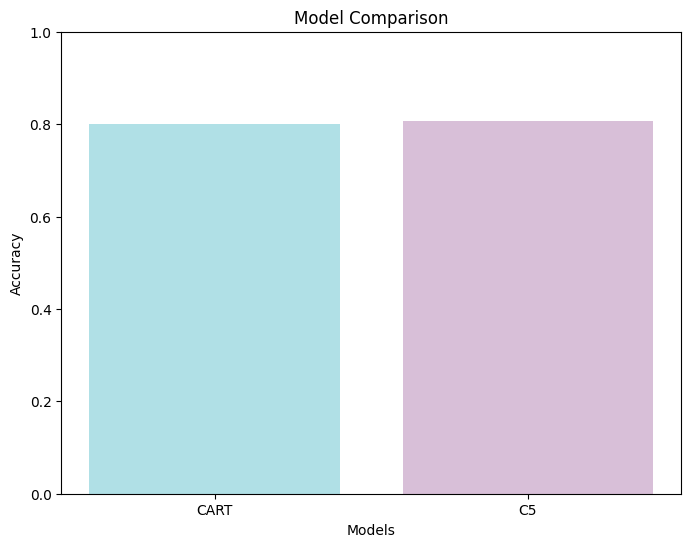

In [ ]:
compareModels(cart_classifier, c5_classifier)

<h4>Summary of findings for Max Depth = 2, Max Leaf Nodes = 3</h4>

<p>With the restrictions of a max depth of 2 and max number of leaf nodes of three, we can see that both models performed fairly well. Both the CART classifier and the C5.0 classifier were about 80% accurate. If we look closely, we can see that the C5.0 classifier performed just slightly better than the CART classifier, but only by 0.6%, so nothing truly noteworthy.</p>



---



<h4>Max Depth = 3, Max Leaf Nodes = 4</h4>



---



In [ ]:
cart_classifier = makeDTModel("gini", X_train, y_train, max_depth=3, max_leaf_nodes=4)
c5_classifier = makeDTModel("entropy", X_train, y_train, max_depth=3, max_leaf_nodes=4)

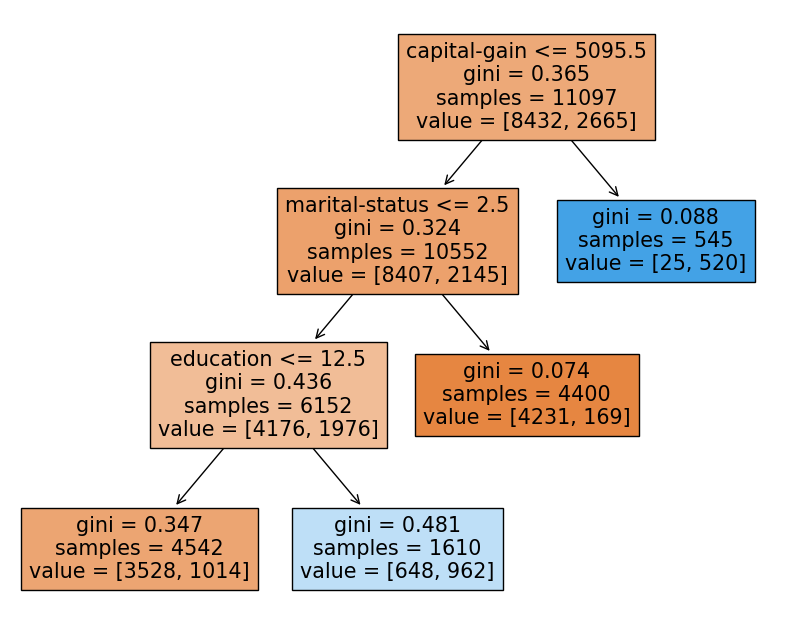

In [ ]:
displayTree(cart_classifier, X)

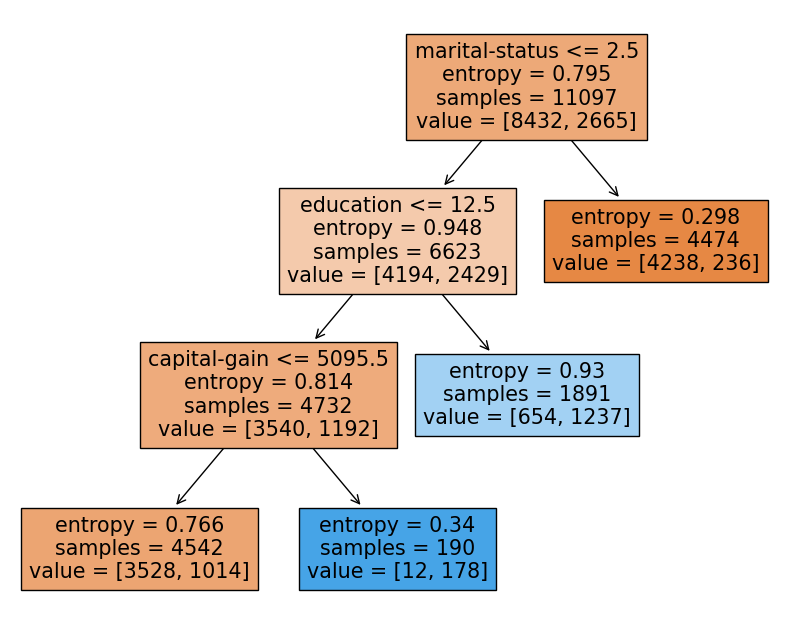

In [ ]:
displayTree(c5_classifier, X)

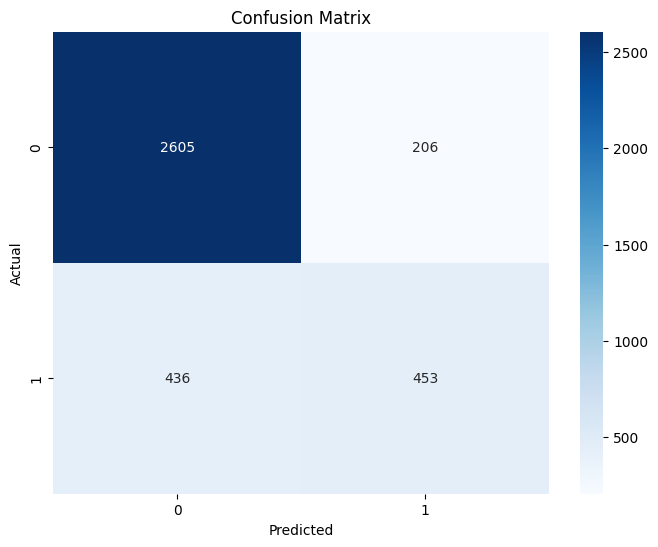

In [ ]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)

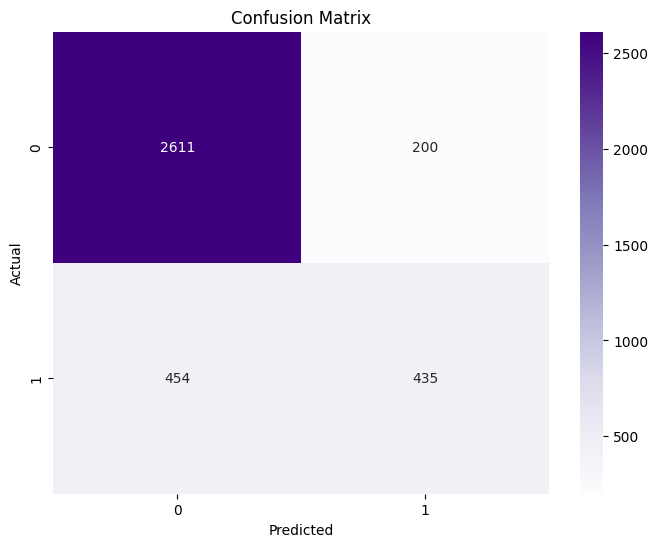

In [ ]:
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

CART Accuracy: 0.8265
C5 Accuracy: 0.8232


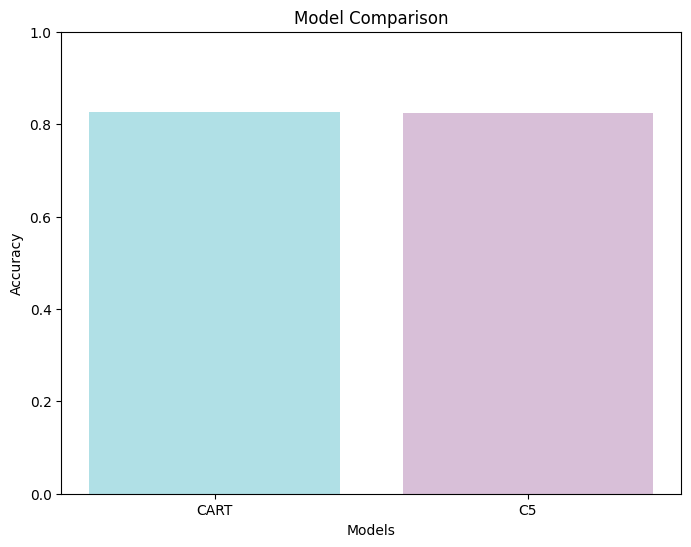

In [ ]:
compareModels(cart_classifier, c5_classifier)

<h4>Summary of findings for Max Depth = 3, Max Leaf Nodes = 4</h4>
<p>From the tests on the data allowing a max depth of 3 and a max number of leaf nodes of 4, we can see that the models improved. Now, both the CART classifier and the C5.0 classifier are around 82% accurate. Unlike the last test of depth of 2 and max leaf nodes of 3, the CART classifier is performing slightly better than the C5.0. Again however, it is nothing significant, only 0.3%.</p>



---



<h4>Max Depth = 4, Max Leaf Nodes = 5</h4>



---



In [ ]:
cart_classifier = makeDTModel("gini", X_train, y_train, max_depth=4, max_leaf_nodes=5)
c5_classifier = makeDTModel("entropy", X_train, y_train, max_depth=4, max_leaf_nodes=5)

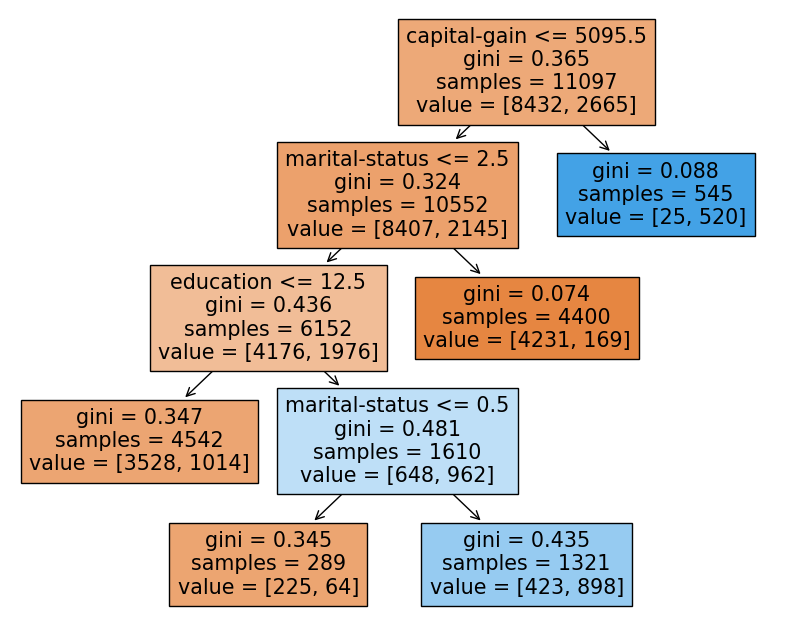

In [ ]:
displayTree(cart_classifier, X)

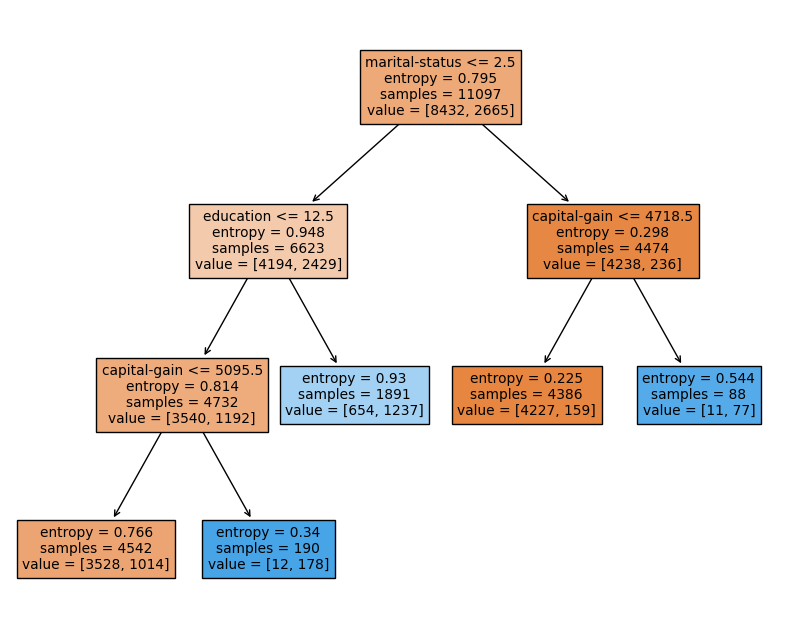

In [ ]:
displayTree(c5_classifier, X)

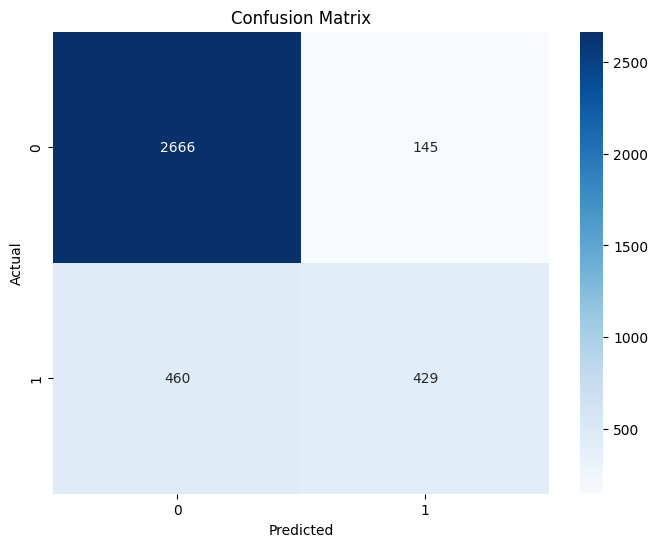

In [ ]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)

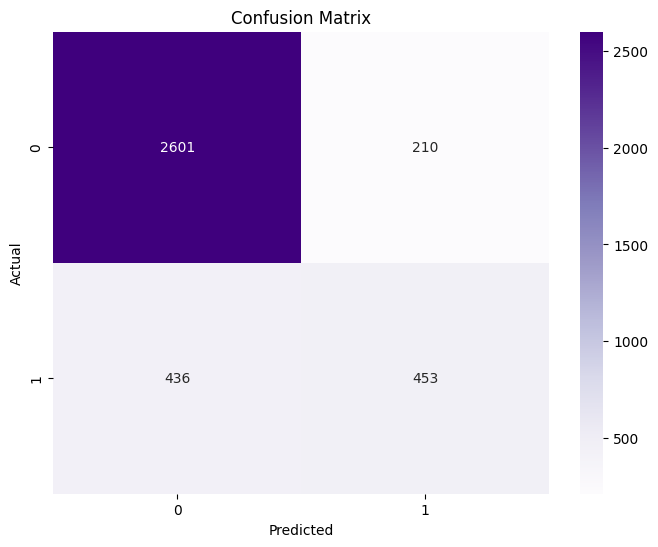

In [ ]:
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

CART Accuracy: 0.8365
C5 Accuracy: 0.8254


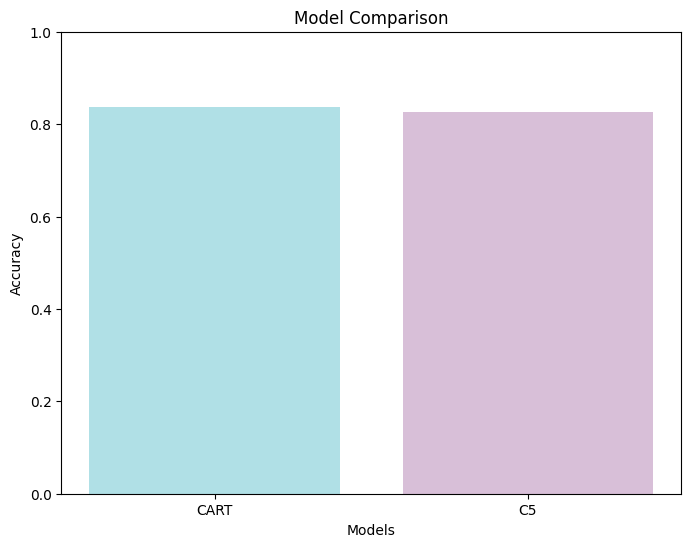

In [ ]:
compareModels(cart_classifier, c5_classifier)

<h4>Summary of findings for Max Depth = 4, Max Leaf Nodes = 5</h4>
<p>This model, allowing a max depth of 4 and max leaf nodes of 5, has performed the best yet, however, it did not excede the others by a significant amount. The CART classifier improved in its acuracy by 1%, while the C5.0 classifier only improved by less than 0.3%.</p>



---



<h4>Max Depth = none, Max Leaf Nodes = none</h4>



---



In [ ]:
cart_classifier = makeDTModel("gini", X_train, y_train)
c5_classifier = makeDTModel("entropy", X_train, y_train)

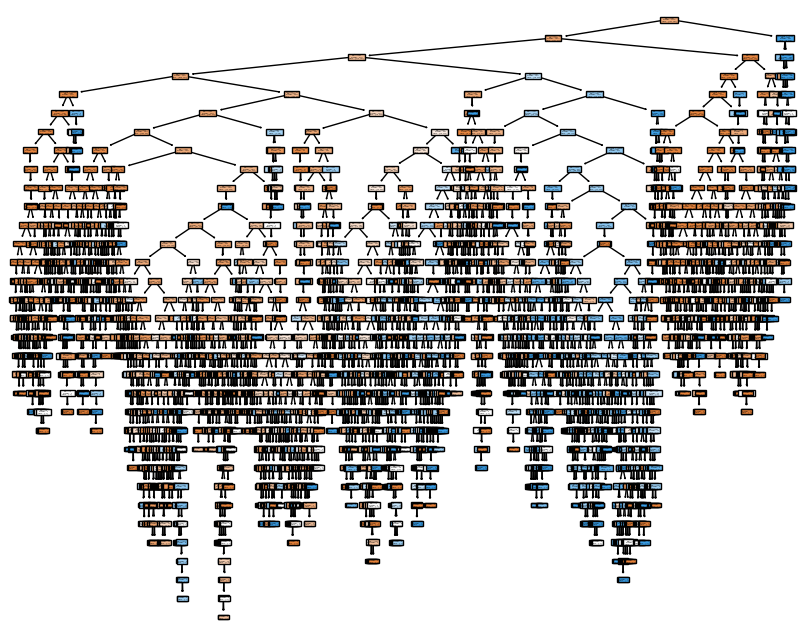

In [ ]:
displayTree(cart_classifier, X)

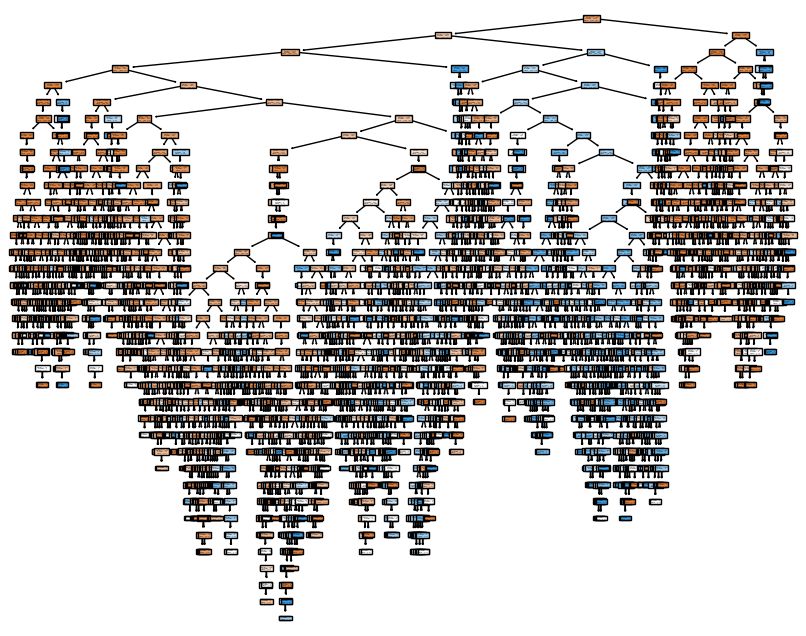

In [ ]:
displayTree(c5_classifier, X)

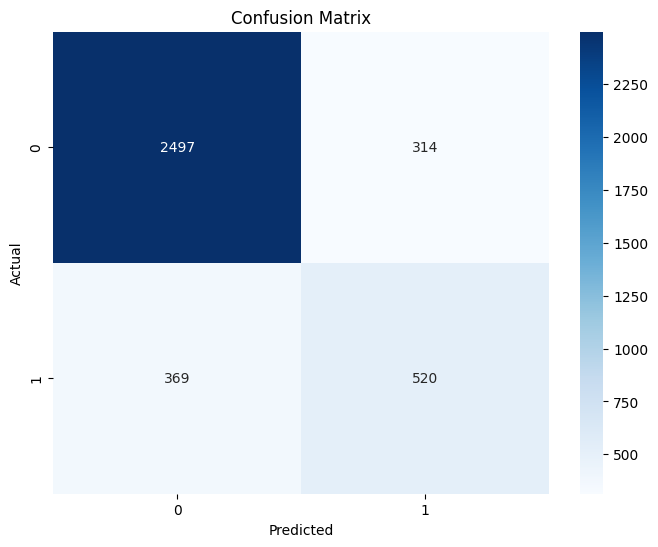

In [ ]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)

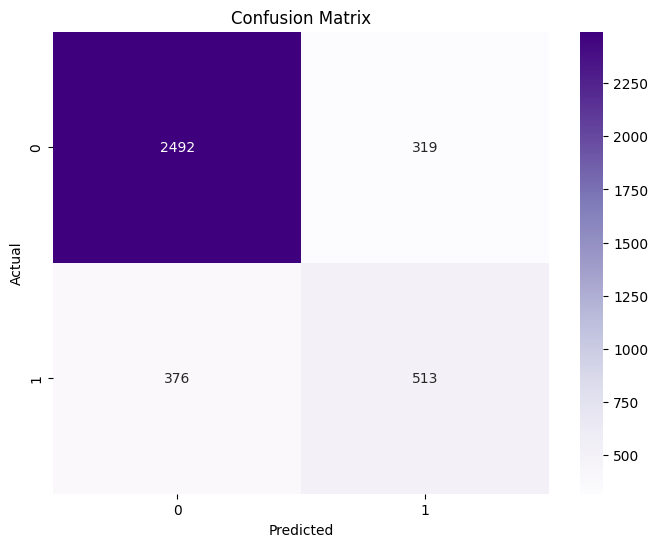

In [ ]:
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

CART Accuracy: 0.8154
C5 Accuracy: 0.8122


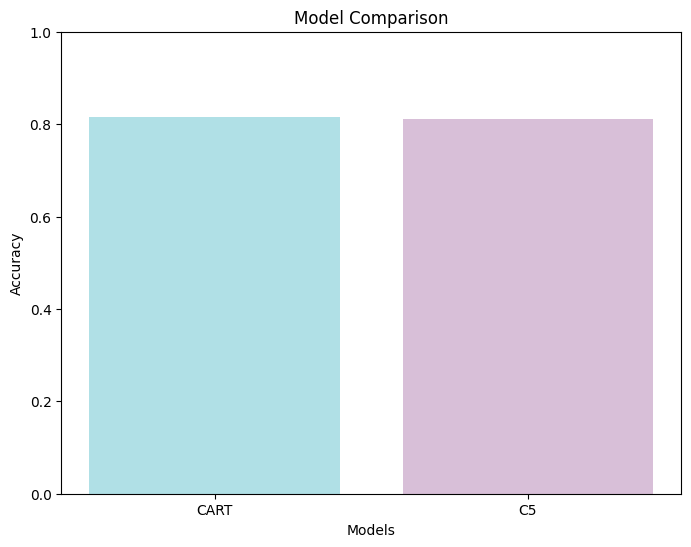

In [ ]:
compareModels(cart_classifier, c5_classifier)

<h4>Summary of findings for Max Depth = 2, Max Leaf Nodes = 3</h4>
<p>By not putting any restrictions in, we can see that these trees are extremely overfitted to the data. They are a huge jumbled mess that cannot provide useful information by looking at the display like the other ones could. Both of the classifiers performed worse than they had with limits placed on the depth and number of leaf nodes. While this is not the worst they have performed in my tests, it is clear that this is not the best way to get accurate results.</p>

<h3>Overall Summary</h3>
<p>From these findings, we can see that max depth and max leaf nodes parameters play a key role in the accuracy of a model. Limiting the model too much, such as in the first example of max depth = 2 and max leaf nodes = 3, brings down the accuracy of the models. On the other hand, giving the models no limitations causes them to be overfitted and has a similar effect of bringing down the accuracy. It is best to not overly prune a decision tree, while also making sure not to let it become overfitted to the data.</p>